In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
X, y = load_breast_cancer(return_X_y = True, as_frame=True)

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
# Normalize the features of X to have comparable results (sklearn's PCA subtracts the feature's means from the features)
std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(X)

X_scaled = pd.DataFrame(data=scaled_x, index=np.arange(scaled_x.shape[0]), columns=X.columns)

In [6]:
X_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
# Compute the covariance matrix
cov_x = np.cov(X_scaled, rowvar=False)

cov_x[:5, :5]

array([[ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151],
       [ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969],
       [ 0.99961207,  0.33011322,  1.00176056,  0.98824361,  0.20764309],
       [ 0.98909547,  0.32165099,  0.98824361,  1.00176056,  0.17734005],
       [ 0.17088151, -0.02342969,  0.20764309,  0.17734005,  1.00176056]])

In [8]:
# Compute the eigenvectors and eigenvalues

eig_val, eig_vect = np.linalg.eig(cov_x)

print(eig_val.shape)
print(eig_vect.shape)

(30,)
(30, 30)


In [9]:
for ev in eig_vect:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [10]:
# Sort the eigenvectors by the eigenvalues, in decreasing order

idx = np.argsort(-np.abs(eig_val))

print(eig_val[idx[:2]])

[13.30499079  5.7013746 ]


In [11]:
# Pick the first k eigenvectors from the sorted ones

k = 2
vectors = eig_vect[:, idx[:k]]

print(vectors.shape)

(30, 2)


In [12]:
# Transform the samples onto the new subspace

pca_x = pd.DataFrame(data=X_scaled.values.dot(vectors), index=np.arange(X_scaled.shape[0]), columns=[f'pc{i}' for i in range(vectors.shape[1])])

In [13]:
pca_x.head()

,pc0,pc1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [14]:
pca_2 = PCA(n_components=k)
sk_pca = pca_2.fit_transform(X_scaled)

In [15]:
sk_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [23]:
np.testing.assert_array_almost_equal(pca_x.values, sk_pca, decimal=6)

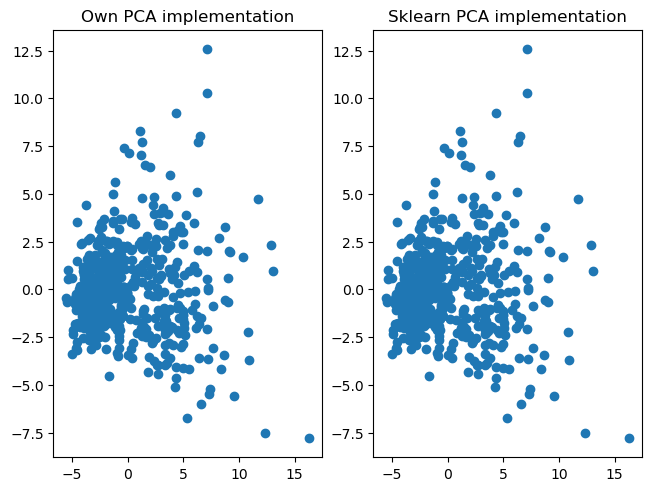

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, layout='constrained')

ax1.scatter(pca_x['pc0'], pca_x['pc1'])
ax1.set_title("Own PCA implementation")

ax2.scatter(sk_pca[:, 0], sk_pca[:, 1])
ax2.set_title("Sklearn PCA implementation")

plt.show()

In [19]:
def pca(X: np.ndarray, k: int) -> np.ndarray:
    cov_x = np.cov(X, rowvar=False)
    eig_val, eig_vect = np.linalg.eig(cov_x)
    idx = np.argsort(-np.abs(eig_val))
    k_pcs = eig_vect[:, idx[:k]] # first k principal components
    return np.dot(X, k_pcs)

In [20]:
pca_vals = pca(X_scaled, k=2)

pca_vals.shape

(569, 2)

In [22]:
np.testing.assert_array_almost_equal(pca_vals, sk_pca, decimal=6)